# Assignment 1- FIT5196 Data Wrangling


# Task 1: Parsing Text Files


## Name: Akshaya Kumar Chandrasekaran         


## ID : 31021301



In this section, several text files related to **COVID-19 tweetes** has been given and were asked to extract informations like created date, tweet id and the tweet text and convert in XML format. 

### **Given:**

    + Several text files containing tweet id, created at and texts (not in the same order) with the key words “id”, “text”, and “created_at”  as attributes.
    
        1. id: is a 19-digit number.

        2. text: is the actual tweet.

        3. Created_at: is the date and time that the tweet was created.

### **Asked:**

    + To design a regular expression and extract the required information and store all the informations from all the files into ONE XML document. 
    
### **Constraints Given:**

    + unique "id" occurence are allowed.
    
    + Tweets only in "English are allowed".
    
    + No more than re, os and langid should be used.

# 1 Methodology to solve the problem


## 1.1 Importing packages:

Importing the allowed packages

In [ ]:
#Importing the three packages 
'''
re for regular expression
os for directory related 
langid for identifying language of the text
'''

import re
import os
import langid

Once the packages were imported, the **present working directory where the files are present is fetched using the os.getcwd()** function and is stored in a variable named **"present_directory"**

In [ ]:
#Getting the present working directory
present_directory = os.getcwd()

#adding the string where this files are present
#file_present_directory = present_directory + "\\31021301-20200828T043706Z-001\\31021301"
#file_present_directory

## 1.2 Reading the contents of the files


+ Creating an empty list to store every file's content. 

+ the idea for creating all_files is to store the contents of each file as lists of list in each index of the list. 

+ Doing this way, iterating through every index and extract the required information based on the regex written and store it back in the list will be made easy through iteration purpose.

In [ ]:
#When reading the files one after the other,
#Storing the contents as a list
all_files=[]

#Reading every text files present in the dictionary
for filename in os.listdir(present_directory):
    if filename.endswith(".txt"):
        
        #Opening the files in read only mode with UTF 8 encoding style 
        #and appending it to the list
        with open(os.path.join(present_directory, filename), 'r', encoding='UTF-8') as f:
            all_files.append(f.read())

## 1.3 Defining Regex:

+ Opened one of the text files and noted down one tweet from the text file to design a regular expression.

#### 1.3.1 Sample 1 to create regular expression

{"data":[{"created_at":"2020-04-18T04:09:25.000Z","id":"1251362171998498816","text":"If we do not follow the lockdown period sincerely, as a result of the COVID-19 infection, India as a nation is bound to fall back 21 years.\nMaking the right choice is our collective responsibility at this moment.https://t.co/oGhKLLuKxO"}


+ In the above sample text, the attribute **created_at is given at the first instance, id at the second instance and text at the third instance.**

So designed a regular expression to extract created_at, id and text as follows:


+  **Attribute id ==>  r'"id":"(\d{19})","text"'** 
            
    + Meaning, start matching if the text contains id inside quotes followed by a :(colon), then capture only the digits when the length of the digits is 19 inside quotes, and stop catpuring. The text must end with the attribute ,"text"
                
                
+ **Attribute created_at ==> r'"created_at":"(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.000Z)","id"'**
        
    + Meaning, start matching if the text contains created_at inside quotes followed by a :(colon), then capture only when there are 4 digits followed by a -(dash) followed by 2 digits followed by a -(dash)followed by 2 digits followed by a -(dash) with a T and followed by 2 digits followed by a :(colon) followed by 2 digits followed by a :(colon) followed by 2 digits followed by a :(colon) and \.000Z at the end. The text must end with the attribute ,"id"
                
                
+ **Attribute text ==> r'"text":"(.*?)"**
        
    + Meaning, start matching if the text contains text inside quotes followed by a :(colon), then capture everything inside a double quotes. 
                
                
When ran the code with the above created expressions, not all texts were captured since the length of the list was too small than expected. 

So opened a second file and saw the texts. It was as follows. 

#### 1.3.2 Sample 2 to create regular expression

{"created_at":"2020-05-07T12:05:29.000Z","text":"¡The Kntonpaper está disponible! https://t.co/MGPempq5FY Gracias a @jmrf61 @cristinamzea @aldocruz_90 #covid19 #vacuna","id":"1258367345367625728"},

Then noticed that the order of attributes change for every text file. So changed the regular expression to a generic one as follows:


+ **Attribute id ==>  r'"id":"(\d{19})"'**

    + **Match in text for the word id inside quotes and start capturing when there are 19 digits inside the quotes** which can be depicted from the below image. 

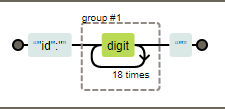



+ **Attribute created_at ==> r'"created_at":"(.{4}-.{2}-.{2})'**
    
    + **In the sample XML file, only the date is printed and not the time. So match in text for the word created at inside the quotes and start capturing any string that is of length 4 followed by a hyphen then two followed by an hyphen and then two** which can be depicted from the below image.

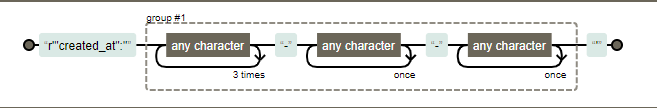



Double quotes are not provided at the end because, the created_at attribute still consists of the time which is not being captured.


+ **For attribute Text ==> r'"text":"((?:[^"\\]|\\.)*)"'**

    +  **Match in text for the word text inside the quotes and start capturing for any characters. A non capturing group has also been included to not capture a " or a \ and capturing of words are done insude double quotes.** which can be depicted from the below image.

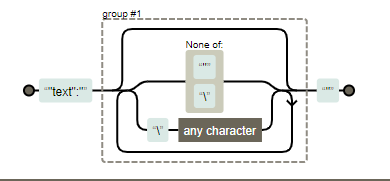


## 1.4 Applying Regex on the files:

+ Once the regex are designed, for each index in the all_files, there will be a list which containts the contents of the text file. **Regular expression is applied on each of the index** and the results of the **extracted text is stored as a list**.

+ **Three different lists are created to store id, created_at and text**.

In [ ]:
'''
apply_regex is an user defined function that takes in a list as an argument.
This functions is for applying regular expression syntax on the list of lists(each file)
and extract the id, text and created at alone seperately and storing each of them 
in an individual list and returns the individual list(id_alone, text_alone and created_alone)
'''

#User defined function
def apply_regex(all_files):
    
    #declaring regular expression for extractig text alone
    test_alone_regex = r'"text":"((?:[^"\\]|\\.)*)"'  
    
    #declaring regular expression for extractig id alone
    id_regex = r'"id":"(\d{19})"'
    
    #declaring regular expression for extractig created_at alone
    created_regex =r'"created_at":"(.{4}-.{2}-.{2})'
    
    #initialising variables
    text_alone = []
    id_alone = []
    created_alone =  []
    
    #Iteratig through the list to apply regular expression at each index and 
    #extract and store the information that is reguired.
    for i in range(len(all_files)):
        text_alone.append(re.findall(test_alone_regex,all_files[i]))
        id_alone.append(re.findall(id_regex,all_files[i]))
        created_alone.append(re.findall(created_regex,all_files[i]))
    
    #returing the list that containts list of lists.
    return text_alone,id_alone,created_alone

In [ ]:
#Calling the user defined function apply_regex that returns 
#list of lists with id,text and created alone seperately.
text_alone,id_alone,created_alone=apply_regex(all_files)

## 1.5 Emoji and XML standards handling:

+ Once the text alone list is created, observed **emoticons were in the raw format** (i.e) they were in the unicodes. 

+ So for each index in the text alone, to covert the emoticons to it's original image format, the sentenses are passed through the encoding and decoding function.

+ **surrogatepass** is given to handle when there are continuous emoticons unicode to identify them and then decode them to the image format.

+ XML coding standards are taken care by using the **replace function for the appropriate symbols** as explained below. This step is done because, when tried to generate the XML document, the XML reserved characters were not decoded porperly. To avoid this inconsistency in the tweet texts, replaced the reserved XML characters through hardcoding.

In [ ]:
'''
rectify_smilie is an user defined function that takes in the list
of lists for text_alone created above and then convert the encoding 
of smilies and replace it with the actual images of smilies
and store it back in the actual text list itself.
It also replaces & with &amp, ' with &apos, > with &gt , < with &lt " with &quot  to actual xml encoding language.
and then return the list of lists of text
'''

#User defined function
def rectify_smilie(text_alone):
    
    #Iterating through elements of list
    for i in range(len(text_alone)):
        
        #iterating through the each elements in ith index
        for j in range(len(text_alone[i])):
            
            #Encoding (uft-16) is done for each text line 
            text_alone[i][j] = eval('"'+text_alone[i][j]+'"').encode('utf-16', 'surrogatepass').decode('utf-16')
            
            #Replaces & with &amp in the text to comply with xml coding 
            text_alone[i][j]=text_alone[i][j].replace('&','&amp;')
            
            #Replaces ' with &apos in the text to comply with xml coding 
            text_alone[i][j]=text_alone[i][j].replace("'","&apos;")
            
            #Replaces > with &gt in the text to comply with xml coding 
            text_alone[i][j]=text_alone[i][j].replace('>','&gt;')
            
            #Replaces < with &lt in the text to comply with xml coding 
            text_alone[i][j]=text_alone[i][j].replace('<','&lt;')
            
            #Replaces " with &quot in the text to comply with xml coding 
            text_alone[i][j]=text_alone[i][j].replace('"','&quot;')
            
    #Returning the list of lists with images of emojies.
    return text_alone

In [ ]:
#Calling the user defined function rectify_smilie that returns 
#list of lists with pictures of emojies instead of the encoded values of that emojis.
text_alone = rectify_smilie(text_alone)

## 1.6 Collating to dictionary type:

+ Since **XML for each date with it's corresponding tweet id and it's text needs to be created, using dictionary type** would be more appropriate with **date as the key and tweet id and text as the value**.

+ Also, **using the lang id package, language test is done to filter out only tweets in english language**.

+ All these **tasks has been handlded in this section** because doing these steps in the **previous task would result in un-even length of the list(text_alone,id_alone and created_alone) making it difficult to iterate** as well as to create XML document. 

In [ ]:
'''
collate_tweets is an user defined function that takes in three lists as arguments. 
text_alone -> list of lists containing textual information alone about the tweets
id_alone -> list of lists containing tweet id alone of the tweets
created_alone -> list of lists containing the created information about the tweets

This function will put in together all the values into a key value pair. 
In this function, duplicate ids are eliminated, only the english language is filtered out.
if the criteria is met, a key as the created day and values as tweets created on those particular day
is created.

This function return a dictionary
'''

#user defined function 
def collate_tweets(text_alone,id_alone,created_alone):
    
    #initialising empty dictionary
    collate_dict = {}
    
    #collection the keys alone
    present_keys = collate_dict.keys()
    
    #For each index in the text alone list
    for i in range(len(text_alone)):
        
        #for each index at the text alone's ith index
        for j in range(len(text_alone[i])):
            
            #checking if the language is english, if true proceed
            if(langid.classify(text_alone[i][j])[0]=='en'):
                
                    #If the key(i.e) the created at already exists, 
                    if(created_alone[i][j] in present_keys):
                        
                        #if the tweet id is not present (to elimitate duplicate keys)
                        if not any(id_alone[i][j] in item for item in created_alone[i][j][0]):
                            
                            #append the tweet id and the it's corresponding text to the key 
                            collate_dict[created_alone[i][j]].append([id_alone[i][j],text_alone[i][j]])
                    else:
                        
                        #else, create a new key in the dictionary if the key does not exists 
                        collate_dict[created_alone[i][j]] = [[id_alone[i][j]]]
                        collate_dict[created_alone[i][j]][0].append(text_alone[i][j])
    
    #return the dictionary with key being the created at and 
    #values being its correspondig id and tweets text created that day
    return collate_dict

In [ ]:
#Calling the user defined function collate_tweets that returns 
#a dictionary with key being the created at and 
#values being its correspondig id and tweets text created that day.
collated_dict = collate_tweets(text_alone,id_alone,created_alone)

## 1.7 Generating XML document

+ With the above created dictionary, iterating through the keys(each date) a **tweets date tag is created** and for the length of each day(i.e) number of tweets in each day, a **tweet id tag is created, with the tweet text inbetween them**.

+ XML is of encoding UTF-8 format with xml version 1. 

+ XML format from the same xml file is as follows.

In [ ]:
"""
<?xml version="1.0" encoding="UTF-8"?>
<data>
<tweets date="DATE INSIDE QUOTES">
<tweet id="TWEET ID INSIDE QUOTES">TWEET TEXT WITHOUT QUOTES</tweet>
</tweets>
</data>
"""

In [ ]:
'''
generate_xml is an user defined function that takes in the dictionary as input. 

For each key, its values are being written in an xml format.
'''

#user defined function
def generate_xml(collated_dict):
    
    #Opening a xml document
    xml_file = open('31021301.xml', 'w',encoding="utf-8")
    
    #writing into the file
    xml_file.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    xml_file.write('<data>\n')
    
    #with the dictonary created above, 
    #for each key (i.e) date writing its values (i.e) tweet id and tweets
    for keys,values in collated_dict.items():
        xml_file.write('<tweets date="' + keys + '">\n')
        for m in range(len(collated_dict[keys])):
            xml_file.write('<tweet id="' + collated_dict[keys][m][0] + '">'+collated_dict[keys][m][1]+'</tweet>\n')
        xml_file.write('</tweets>\n')

    #ending the data tag
    xml_file.write('</data>')
    
    #Closing the xml file
    xml_file.close()

In [ ]:
#calling the function generate_xml to generate xml file
generate_xml(collated_dict)

## 1.8 Challenges faced:

+ Converting the emoticons to image format.
+ Allow only the unique ids when generating dictionary.

## 1.9 References:

1. 2020 Python Software Foundation (2018). langid 1.1dev. Retrived from :
https://pypi.org/project/langid/1.1dev/

2. Jonny Fox(2017).Regex tutorial — A quick cheatsheet by examples. Retrived from :
https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285

3.  Jeff Avallone - Images for Regex used retrived from:
https://regexper.com/